## Exercici 1
**Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.**

In [27]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TAIDA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
text = 'Long long time ago, in the age of gods and heroes, three horrible sisters lived in the region of Atlas who were known as Gorgons. The most terrible of the three was called Medusa. From Medusas head, instead of hair, living snakes came out. And when Medusa saw the face of a man, dog or living being, the man, the dog and the living being were immediately turned into statues of stone. During years, a lot of brave and well armed heroes had come to the region of Atlas to kill Medusa. None could kill her. Warriors and warriors were seen in all parts in different attitudes, but motionless and stiff. Then Perseus, son of Jupiter, came. Perseus knew how dangerous were Medusa?s eyes but he was very well prepared. He had a curved sword a present from god Mercury. He had a very hard shield made out of bronze and as plain as a mirror. And he had also wings which flied each time that he put them in his hills.He arrived flying. But instead of throwing himself against Medusa, he remained far only worrying about not looking her to the face, not seeing her eyes under no circumstances. And as it was necessary to spy her all the time, he used the bronze shield as a mirror to watch all that she was doing.Medusa was going from one place to another, making efforts to scare Perseus. She cried horrible things and the snakes of her head where moving and whistling furiously. But she never got that Perseus watched her directly.Tired, she fell asleep. Her terrible eyes closed and little by little, her snakes also fell asleep. Then Perseus came without making noise and cut her head off with just one cut.During all his life, he kept Medusa?s head which he used many times to turn his enemies into stone.'


In [20]:
tokenized_text=word_tokenize(text)
print(tokenized_text)

['Long', 'long', 'time', 'ago', ',', 'in', 'the', 'age', 'of', 'gods', 'and', 'heroes', ',', 'three', 'horrible', 'sisters', 'lived', 'in', 'the', 'region', 'of', 'Atlas', 'who', 'were', 'known', 'as', 'Gorgons', '.', 'The', 'most', 'terrible', 'of', 'the', 'three', 'was', 'called', 'Medusa', '.', 'From', 'Medusas', 'head', ',', 'instead', 'of', 'hair', ',', 'living', 'snakes', 'came', 'out', '.', 'And', 'when', 'Medusa', 'saw', 'the', 'face', 'of', 'a', 'man', ',', 'dog', 'or', 'living', 'being', ',', 'the', 'man', ',', 'the', 'dog', 'and', 'the', 'living', 'being', 'were', 'immediately', 'turned', 'into', 'statues', 'of', 'stone', '.', 'During', 'years', ',', 'a', 'lot', 'of', 'brave', 'and', 'well', 'armed', 'heroes', 'had', 'come', 'to', 'the', 'region', 'of', 'Atlas', 'to', 'kill', 'Medusa', '.', 'None', 'could', 'kill', 'her', '.', 'Warriors', 'and', 'warriors', 'were', 'seen', 'in', 'all', 'parts', 'in', 'different', 'attitudes', ',', 'but', 'motionless', 'and', 'stiff', '.', 'T

In [21]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_text)
print(fdist)

<FreqDist with 173 samples and 351 outcomes>


In [22]:
# vemos cuáles son las palabras más frecuentes
fdist.most_common(6)

[(',', 18), ('.', 18), ('the', 12), ('of', 12), ('and', 10), ('to', 8)]

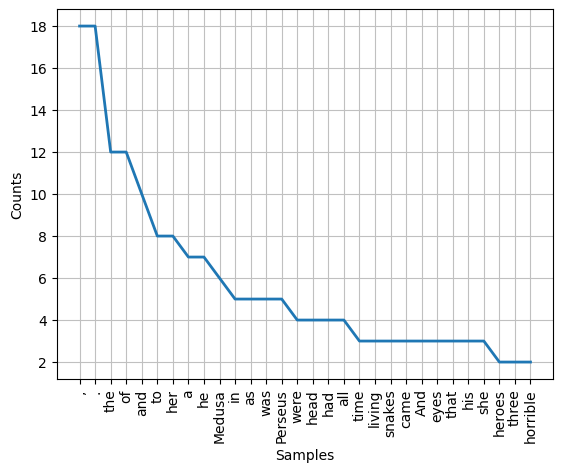

<IPython.core.display.Javascript object>

In [23]:
# reflejamos en una gráfica la frecuencia
fdist.plot(30,cumulative=False)
plt.show()

## Exercici 2
**Treu les stopwords i realitza stemming al teu conjunt de dades.**

In [25]:
import re

print('Número de tokens en nuestro texto antes de limpiar signos de puntuación: ',len(tokenized_text))

tokenized_text = [re.sub("[^-9A-Za-z ]", "" , w) for w in tokenized_text]

while '' in tokenized_text:
    tokenized_text.remove('')

print('Número de tokens en nuestro texto después de limpiar signos de puntuación: ',len(tokenized_text))

Número de tokens en nuestro texto antes de limpiar signos de puntuación:  351
Número de tokens en nuestro texto después de limpiar signos de puntuación:  313


In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TAIDA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:

# obtenemos la lista de Stopwords de un módulo de la librería nltk, hacemos un set con ellas
stop_words=set(stopwords.words("english"))
print(stop_words)

{'haven', "wasn't", 'between', 'didn', 'myself', 'down', 'hers', 'ours', "couldn't", 'we', 'couldn', "should've", 'because', 'has', 'does', 'should', 'not', 'after', 'o', "mightn't", 't', 'ourselves', 'these', 'than', 'other', 'have', "didn't", 'needn', 'more', 'herself', "don't", 'did', 'from', 'ma', 'wasn', 'under', 'where', 'of', 'yourself', "shouldn't", 'mustn', "that'll", 'them', 'to', 'there', 'but', 'here', "weren't", 'shouldn', 'wouldn', 'out', 'your', 'itself', "you're", 'on', 'then', 'all', 'why', "won't", 'until', 'yourselves', 'by', 'its', 'who', "she's", 'at', 'over', 'mightn', 'into', 'aren', 'hadn', "it's", 'were', 'and', 'own', 'no', 'shan', 'me', 'such', "doesn't", "wouldn't", 'below', 'if', "shan't", 'weren', 'my', 'now', 'a', 'you', "needn't", 'themselves', 'with', 'any', 'him', "hasn't", 'i', 'whom', 'his', 'd', 'they', 'some', 'when', 'm', 've', 'above', 'up', 'yours', 'do', 'before', "haven't", 'those', 'during', 'in', "isn't", 'their', 'being', 'what', 'doesn', '

In [31]:
# filtramos nuestros tokens
filtered_text=[]
for word in tokenized_text:
    if word not in stop_words:
        filtered_text.append(word)
print("Tokenized Sentence:",tokenized_text)
print('')
print("Filterd Sentence:",filtered_text)

Tokenized Sentence: ['Long', 'long', 'time', 'ago', 'in', 'the', 'age', 'of', 'gods', 'and', 'heroes', 'three', 'horrible', 'sisters', 'lived', 'in', 'the', 'region', 'of', 'Atlas', 'who', 'were', 'known', 'as', 'Gorgons', 'The', 'most', 'terrible', 'of', 'the', 'three', 'was', 'called', 'Medusa', 'From', 'Medusas', 'head', 'instead', 'of', 'hair', 'living', 'snakes', 'came', 'out', 'And', 'when', 'Medusa', 'saw', 'the', 'face', 'of', 'a', 'man', 'dog', 'or', 'living', 'being', 'the', 'man', 'the', 'dog', 'and', 'the', 'living', 'being', 'were', 'immediately', 'turned', 'into', 'statues', 'of', 'stone', 'During', 'years', 'a', 'lot', 'of', 'brave', 'and', 'well', 'armed', 'heroes', 'had', 'come', 'to', 'the', 'region', 'of', 'Atlas', 'to', 'kill', 'Medusa', 'None', 'could', 'kill', 'her', 'Warriors', 'and', 'warriors', 'were', 'seen', 'in', 'all', 'parts', 'in', 'different', 'attitudes', 'but', 'motionless', 'and', 'stiff', 'Then', 'Perseus', 'son', 'of', 'Jupiter', 'came', 'Perseus', 

In [32]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_text:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_text)
print('')
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Long', 'long', 'time', 'ago', 'age', 'gods', 'heroes', 'three', 'horrible', 'sisters', 'lived', 'region', 'Atlas', 'known', 'Gorgons', 'The', 'terrible', 'three', 'called', 'Medusa', 'From', 'Medusas', 'head', 'instead', 'hair', 'living', 'snakes', 'came', 'And', 'Medusa', 'saw', 'face', 'man', 'dog', 'living', 'man', 'dog', 'living', 'immediately', 'turned', 'statues', 'stone', 'During', 'years', 'lot', 'brave', 'well', 'armed', 'heroes', 'come', 'region', 'Atlas', 'kill', 'Medusa', 'None', 'could', 'kill', 'Warriors', 'warriors', 'seen', 'parts', 'different', 'attitudes', 'motionless', 'stiff', 'Then', 'Perseus', 'son', 'Jupiter', 'came', 'Perseus', 'knew', 'dangerous', 'Medusa', 'eyes', 'well', 'prepared', 'He', 'curved', 'sword', 'present', 'god', 'Mercury', 'He', 'hard', 'shield', 'made', 'bronze', 'plain', 'mirror', 'And', 'also', 'wings', 'flied', 'time', 'put', 'hillsHe', 'arrived', 'flying', 'But', 'instead', 'throwing', 'Medusa', 'remained', 'far', 'worry

In [33]:
fdist = FreqDist(stemmed_words)
print(fdist)

<FreqDist with 117 samples and 176 outcomes>


In [34]:
fdist.most_common(6)

[('medusa', 7),
 ('perseu', 5),
 ('time', 4),
 ('live', 4),
 ('head', 4),
 ('snake', 3)]

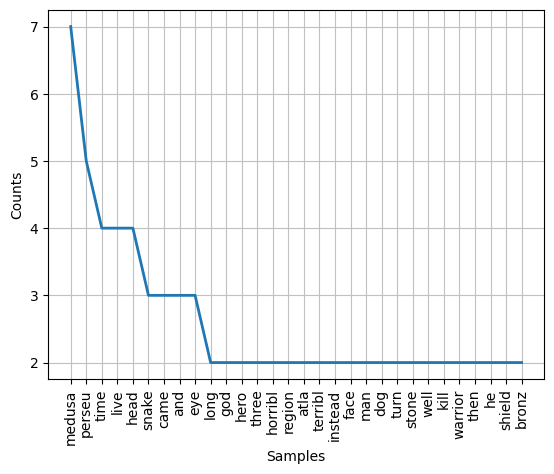

<IPython.core.display.Javascript object>

In [35]:
fdist.plot(30,cumulative=False)
plt.show()

In [36]:
stemmed_words

['long',
 'long',
 'time',
 'ago',
 'age',
 'god',
 'hero',
 'three',
 'horribl',
 'sister',
 'live',
 'region',
 'atla',
 'known',
 'gorgon',
 'the',
 'terribl',
 'three',
 'call',
 'medusa',
 'from',
 'medusa',
 'head',
 'instead',
 'hair',
 'live',
 'snake',
 'came',
 'and',
 'medusa',
 'saw',
 'face',
 'man',
 'dog',
 'live',
 'man',
 'dog',
 'live',
 'immedi',
 'turn',
 'statu',
 'stone',
 'dure',
 'year',
 'lot',
 'brave',
 'well',
 'arm',
 'hero',
 'come',
 'region',
 'atla',
 'kill',
 'medusa',
 'none',
 'could',
 'kill',
 'warrior',
 'warrior',
 'seen',
 'part',
 'differ',
 'attitud',
 'motionless',
 'stiff',
 'then',
 'perseu',
 'son',
 'jupit',
 'came',
 'perseu',
 'knew',
 'danger',
 'medusa',
 'eye',
 'well',
 'prepar',
 'he',
 'curv',
 'sword',
 'present',
 'god',
 'mercuri',
 'he',
 'hard',
 'shield',
 'made',
 'bronz',
 'plain',
 'mirror',
 'and',
 'also',
 'wing',
 'fli',
 'time',
 'put',
 'hillsh',
 'arriv',
 'fli',
 'but',
 'instead',
 'throw',
 'medusa',
 'remain',


## Exercici 3
**Realitza sentiment analysis al teu conjunt de dades.**

In [37]:
from nltk.tokenize import sent_tokenize
# tokenizamos nuestro texto en frases
tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['Long long time ago, in the age of gods and heroes, three horrible sisters lived in the region of Atlas who were known as Gorgons.', 'The most terrible of the three was called Medusa.', 'From Medusas head, instead of hair, living snakes came out.', 'And when Medusa saw the face of a man, dog or living being, the man, the dog and the living being were immediately turned into statues of stone.', 'During years, a lot of brave and well armed heroes had come to the region of Atlas to kill Medusa.', 'None could kill her.', 'Warriors and warriors were seen in all parts in different attitudes, but motionless and stiff.', 'Then Perseus, son of Jupiter, came.', 'Perseus knew how dangerous were Medusa?s eyes but he was very well prepared.', 'He had a curved sword a present from god Mercury.', 'He had a very hard shield made out of bronze and as plain as a mirror.', 'And he had also wings which flied each time that he put them in his hills.He arrived flying.', 'But instead of throwing himself aga

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
 import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TAIDA\AppData\Roaming\nltk_data...


True

In [41]:
for sentence in tokenized_sent:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print()    

Long long time ago, in the age of gods and heroes, three horrible sisters lived in the region of Atlas who were known as Gorgons.
compound: -0.0516, 
neg: 0.117, 
neu: 0.772, 
pos: 0.111, 

The most terrible of the three was called Medusa.
compound: -0.5256, 
neg: 0.298, 
neu: 0.702, 
pos: 0.0, 

From Medusas head, instead of hair, living snakes came out.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

And when Medusa saw the face of a man, dog or living being, the man, the dog and the living being were immediately turned into statues of stone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

During years, a lot of brave and well armed heroes had come to the region of Atlas to kill Medusa.
compound: 0.4767, 
neg: 0.165, 
neu: 0.526, 
pos: 0.309, 

None could kill her.
compound: 0.5773, 
neg: 0.0, 
neu: 0.445, 
pos: 0.555, 

Warriors and warriors were seen in all parts in different attitudes, but motionless and stiff.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

Then Perseus, so

In [42]:
# recogemos el resultado en un dataframe para poder traajar con estos datos

df_text = pd.DataFrame((tokenized_sent), columns=['token'])
df_text['neg'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neg'])
df_text['neu'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neu'])
df_text['pos'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['pos'])
df_text['compound'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['compound'])

df_text

,token,neg,neu,pos,compound
0,"Long long time ago, in the age of gods and her...",0.117,0.772,0.111,-0.0516
1,The most terrible of the three was called Medusa.,0.298,0.702,0.000,-0.5256
2,"From Medusas head, instead of hair, living sna...",0.000,1.000,0.000,0.0000
3,"And when Medusa saw the face of a man, dog or ...",0.000,1.000,0.000,0.0000
4,"During years, a lot of brave and well armed he...",0.165,0.526,0.309,0.4767
5,None could kill her.,0.000,0.445,0.555,0.5773
6,Warriors and warriors were seen in all parts i...,0.000,1.000,0.000,0.0000
7,"Then Perseus, son of Jupiter, came.",0.000,1.000,0.000,0.0000
8,Perseus knew how dangerous were Medusa?s eyes ...,0.114,0.558,0.327,0.5868
9,He had a curved sword a present from god Mercury.,0.000,0.769,0.231,0.2732
